In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver, legend_outside
import gas_phase_data
import numpy as np
import apogee_analysis as aah
from vice_utils import load_model

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import sys
sys.path.append("../")
import surp
import multizone_sim
import vice
import pickle
from vice_to_pickle import vice_model, pickle_output
import pandas as pd
from dataclasses import dataclass
import rc_params

In [4]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    

In [5]:
def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta 
    else:
        name = id.name
    pickle_name = "pickles/" + name + ".pickle"
    return vice_model.from_file(pickle_name)

In [6]:
def compare_cooh(models):
    name_0 = list(models.keys())[0]
    for name, model in models.items():
        model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4), label=name, plot_data=name==name_0)
    legend_outside()
    
def compare_cooh_stars(models):
    for name, model in models.items():
        model.plot_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4), label=name)
        plt.title(name)
        plt.show()

In [7]:
def compare_coofe(models):
    name_0 = list(models.keys())[0]

    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee")
        plt.title("[O/H] = %1.1f" % o)
        legend_outside()  
        plt.show()

def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()

In [8]:
def compare_mdf(models):
    for ratio in ["[o/h]", "[fe/h]", "[o/fe]", "[c/o]", "[c/h]"]:
        for name, model in models.items():
            model.plot_mdf(ratio, label = name, xlim=(-1.5, 1))
        legend_outside()
        plt.show()

In [9]:
def compare_stars(model_names, labels=None):
    if labels is None:
        labels = model_names
        
    models = {label: find_model(name) for label, name in zip(labels, model_names)}
    
    compare_cooh_stars(models)
    compare_coofe_stars(models)

In [10]:
def compare(model_names, labels=None, mdf=False):
    if labels is None:
        labels = model_names
        
    models = {label: find_model(name) for label, name in zip(labels, model_names)}
    compare_cooh(models)
    plt.show()
    compare_coofe(models)
    if mdf:
        compare_mdf(models)

In [11]:
for i in range(4):
    y_agb = [0.000347, 0.000585, 0.000060, 0.000421][i]
    print()
    print(["c11", "k10", "v13", "k16"][i])
    print("f_agb\t\talpha_agb\talpha_cc")
    eta = 1

    for f_agb in [0.2, 0.4, 0.6]:
        y_cc_0 = 0.005
        y_c = 0.00724 * eta
        alpha_agb = f_agb*y_c/y_agb
        alpha_cc = (y_c - alpha_agb*y_agb)/y_cc_0
        print("%1.1f\t\t%1.1f\t\t%1.1f" % (f_agb, alpha_agb, alpha_cc))



c11
f_agb		alpha_agb	alpha_cc
0.2		4.2		1.2
0.4		8.3		0.9
0.6		12.5		0.6

k10
f_agb		alpha_agb	alpha_cc
0.2		2.5		1.2
0.4		5.0		0.9
0.6		7.4		0.6

v13
f_agb		alpha_agb	alpha_cc
0.2		24.1		1.2
0.4		48.3		0.9
0.6		72.4		0.6

k16
f_agb		alpha_agb	alpha_cc
0.2		3.4		1.2
0.4		6.9		0.9
0.6		10.3		0.6


In [12]:
ls pickles/cristallo11*

pickles/cristallo11_f0.05_Z0.3_eta1.pickle
pickles/cristallo11_f0.1_Z0.3_eta1.pickle
pickles/cristallo11_f0.2_Z0.15_eta0.3.pickle
pickles/cristallo11_f0.2_Z0.15_eta0.6.pickle
pickles/cristallo11_f0.2_Z0.15_eta1.pickle
pickles/cristallo11_f0.2_Z0.3_eta0.3_lateburst.pickle
pickles/cristallo11_f0.2_Z0.3_eta0.3.pickle
pickles/cristallo11_f0.2_Z0.3_eta0.6.pickle
pickles/cristallo11_f0.2_Z0.3_eta1_lateburst.pickle
pickles/cristallo11_f0.2_Z0.3_eta1.pickle
pickles/cristallo11_f0.2_Z0.5_eta0.3.pickle
pickles/cristallo11_f0.2_Z0.5_eta0.6.pickle
pickles/cristallo11_f0.2_Z0.5_eta1.pickle
pickles/cristallo11_f0.2_Z0.6_eta0.3_lateburst.pickle
pickles/cristallo11_f0.2_Z0.6_eta1_lateburst.pickle
pickles/cristallo11_f0.2_Z0_eta0.3_lateburst.pickle
pickles/cristallo11_f0.2_Z0_eta1_lateburst.pickle
pickles/cristallo11_f0.4_Z0.15_eta0.3.pickle
pickles/cristallo11_f0.4_Z0.15_eta0.6.pickle
pickles/cristallo11_f0.4_Z0.15_eta1.pickle
pickles/cristallo11_f0.4_Z0.3_eta0.3.pickle
pickles/cristallo11_f0.4_Z0.3_e

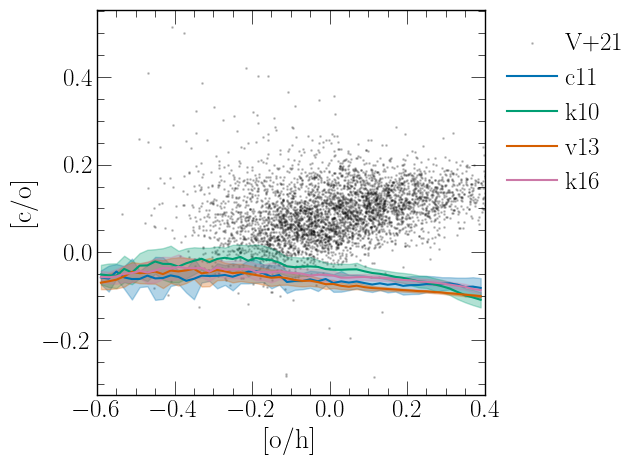

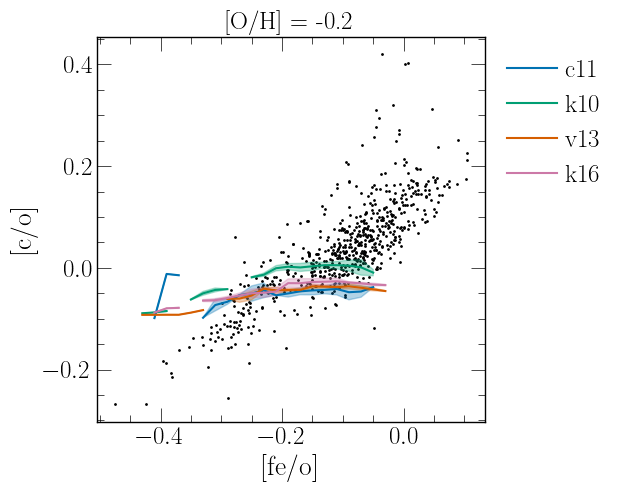

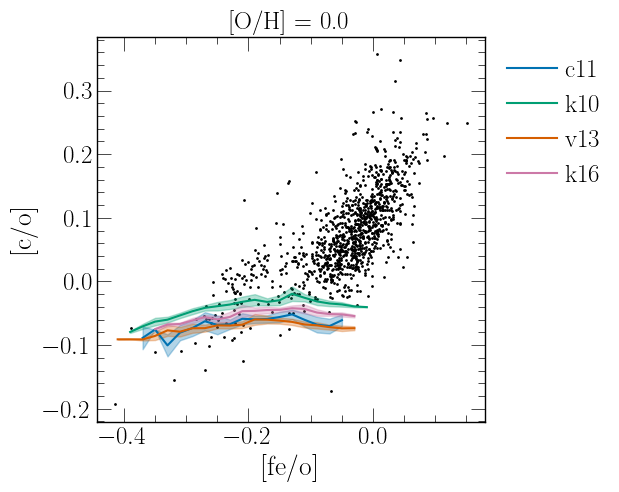

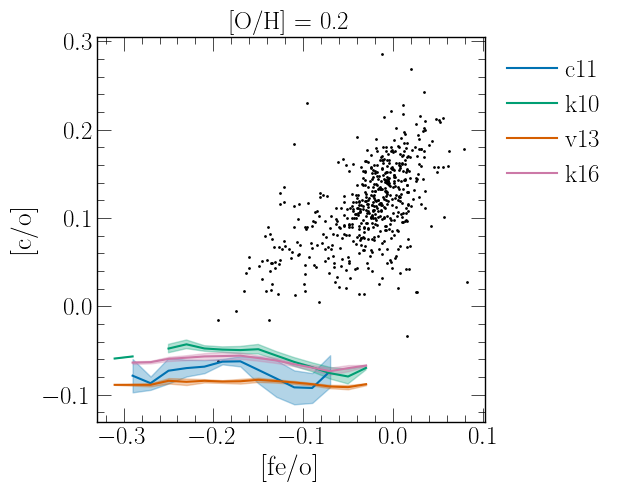

In [24]:
names = []
for s in ["fiducial", "k10", "v13", "k16"]:
    names.append(model_id(name=s))
compare(names, ["c11", "k10", "v13", "k16"])

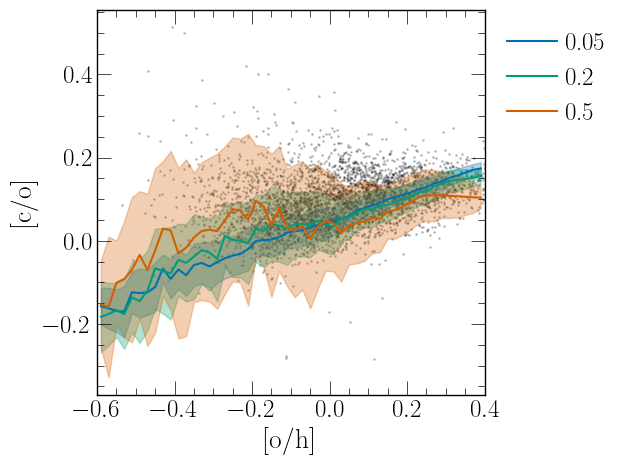

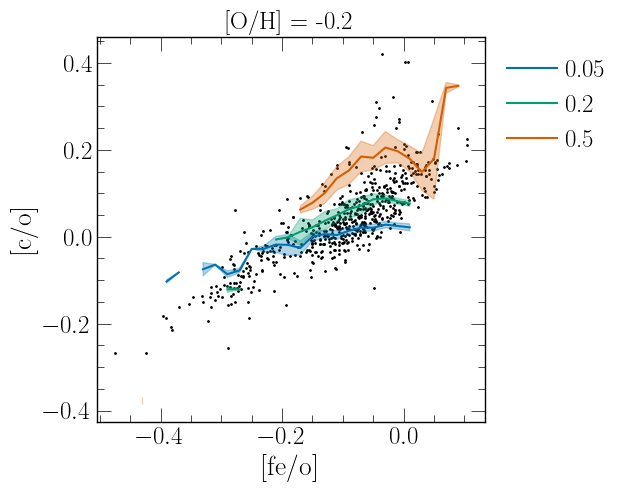

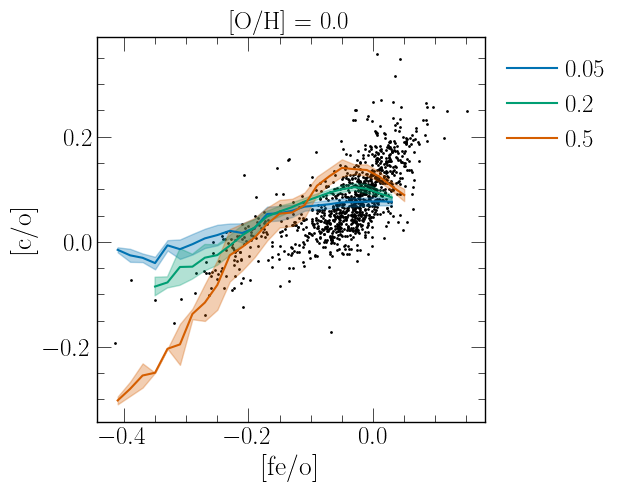

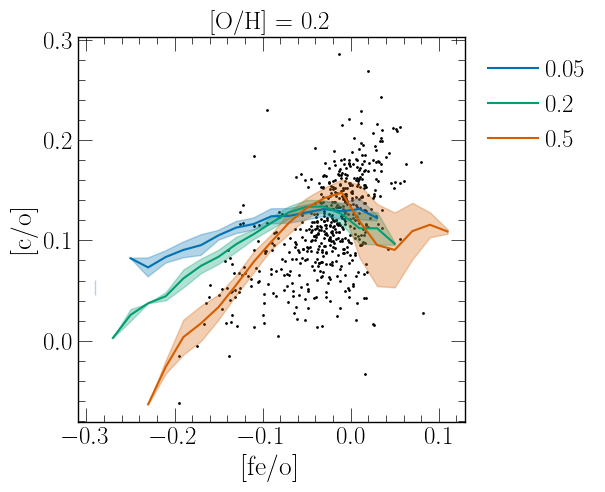

In [17]:
names = []
for f in ["0.05", "0.2", "0.5"]:
    agb = "cristallo11"
    beta = "0.3"
    eta = "1"
    names.append(model_id(agb=agb, beta=beta, eta=eta, f_agb=f))
compare(names, ["0.05", "0.2", "0.5"])

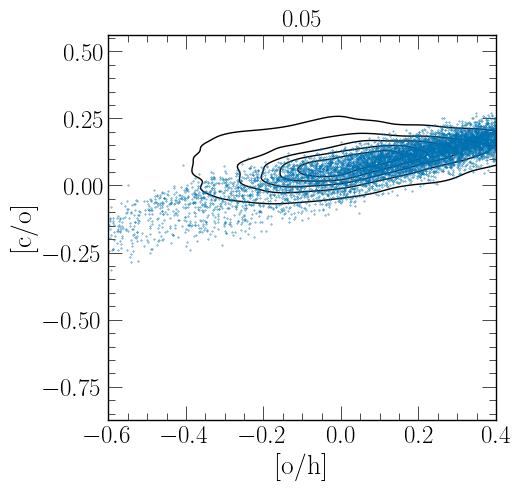

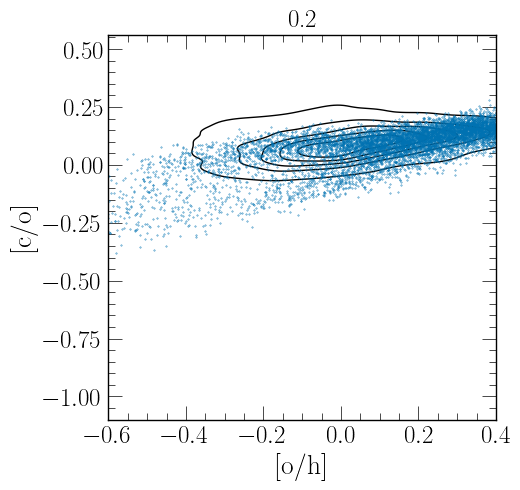

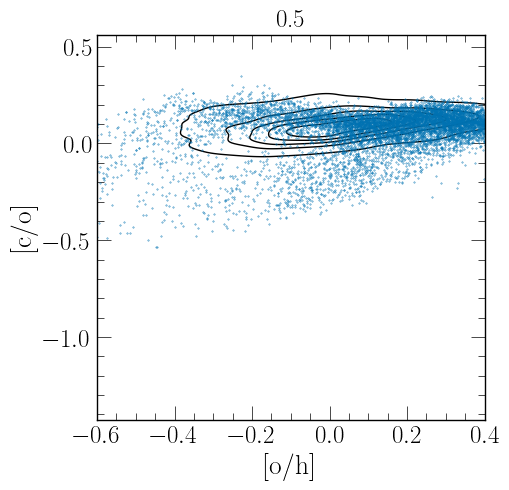

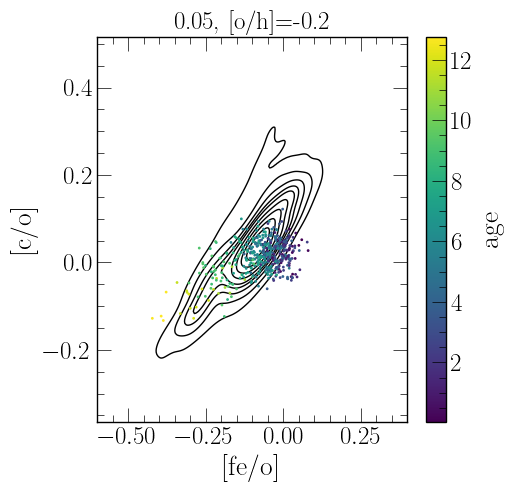

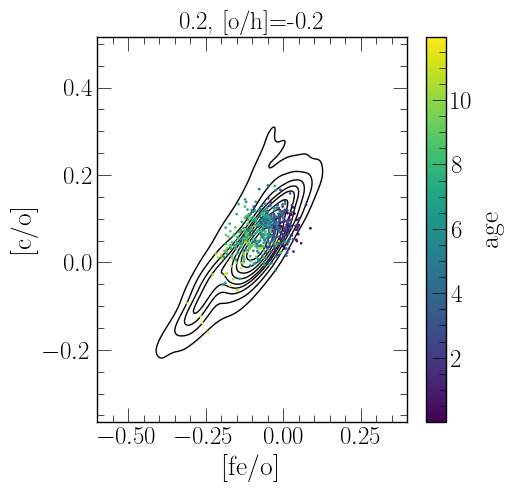

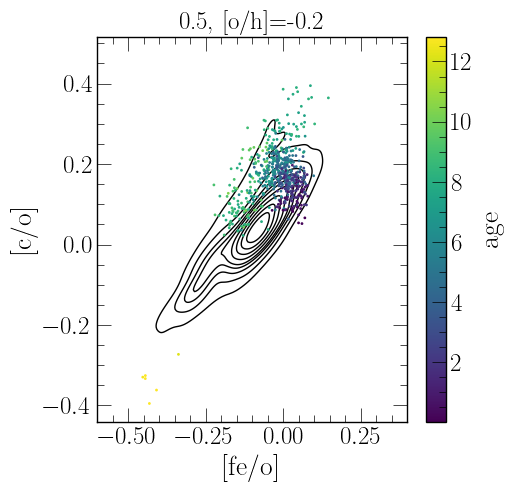

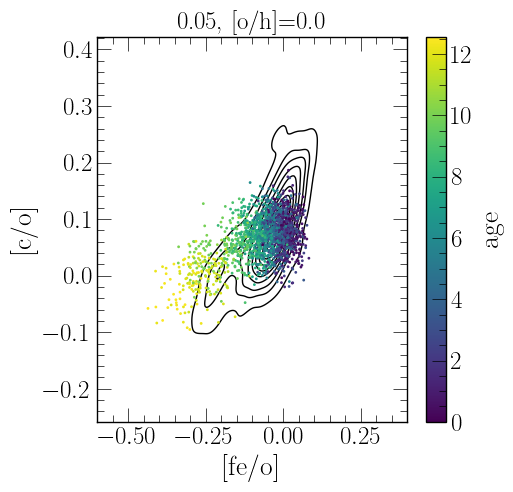

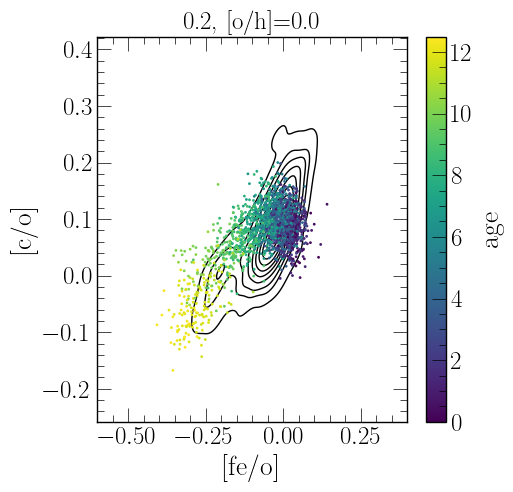

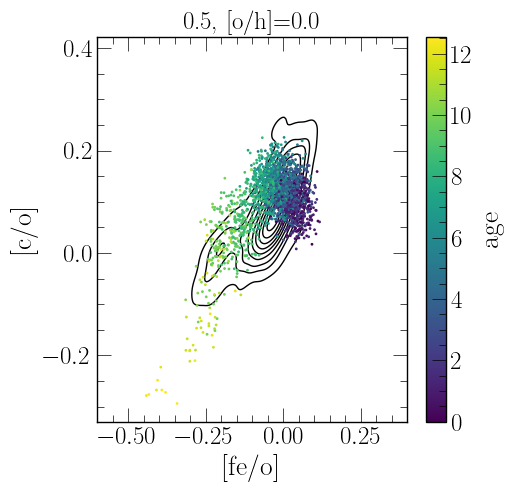

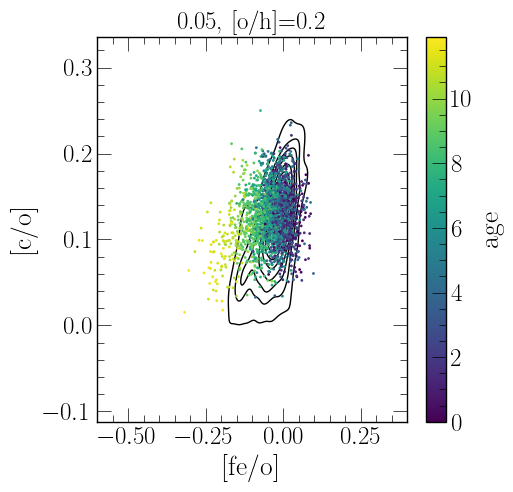

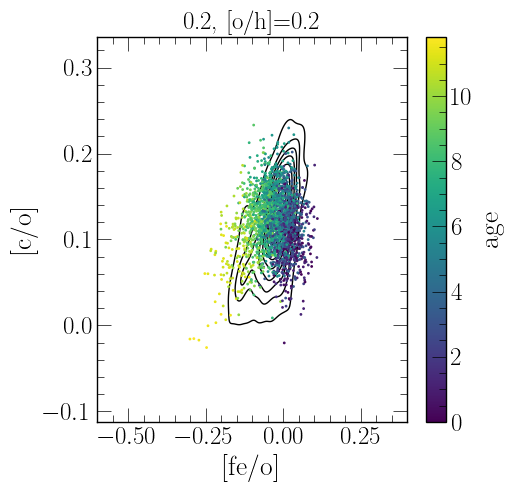

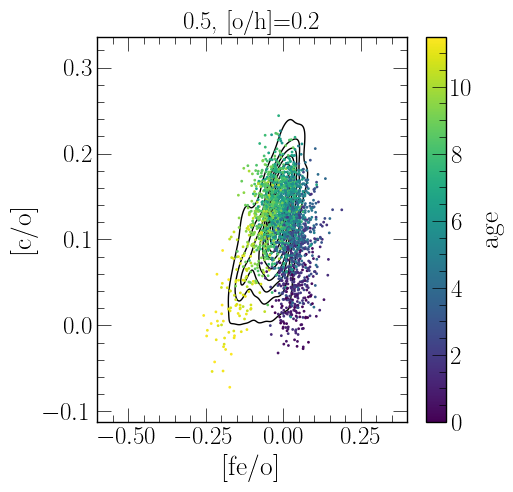

In [16]:
compare_stars(names, ["0.05", "0.2", "0.5"])

In [ ]:
compare

In [60]:
names = []
for beta in ["0.15", "0.3", "0.5"]:
    agb = "cristallo11"
    f = "0.2"
    eta = "0.3"
    names.append(model_id(agb=agb, beta=beta, eta=eta, f_agb=f))

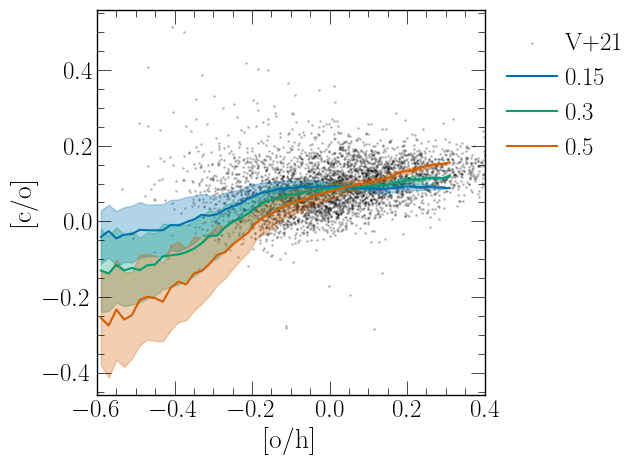

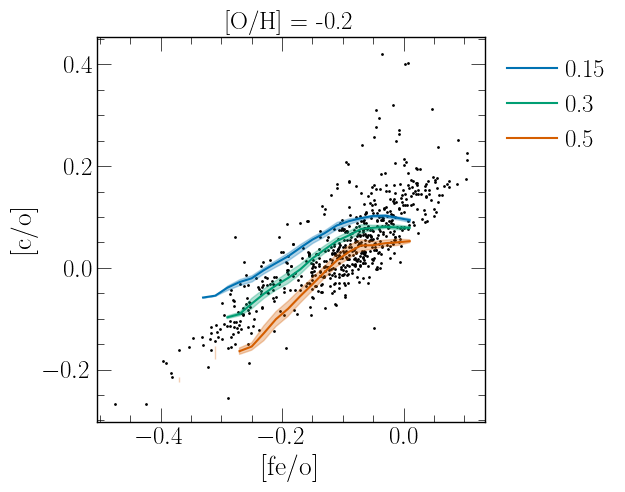

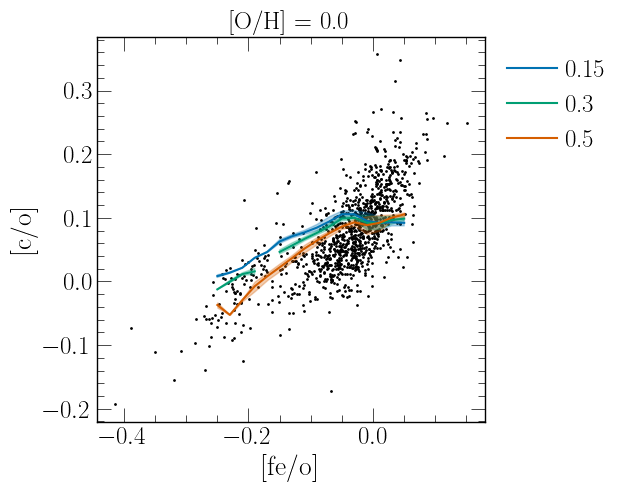

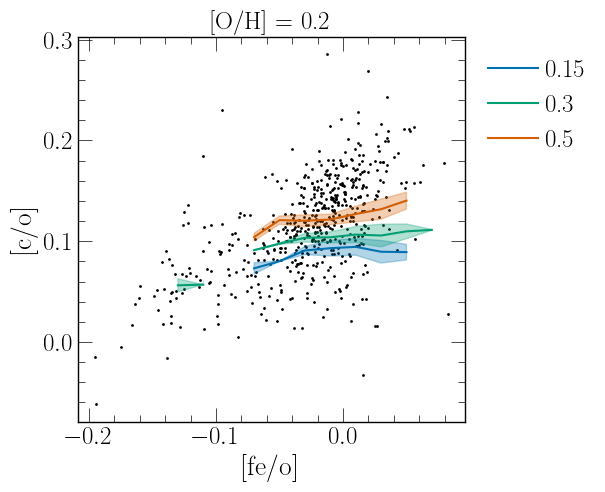

In [61]:
compare(names, ["0.15", "0.3", "0.5"])

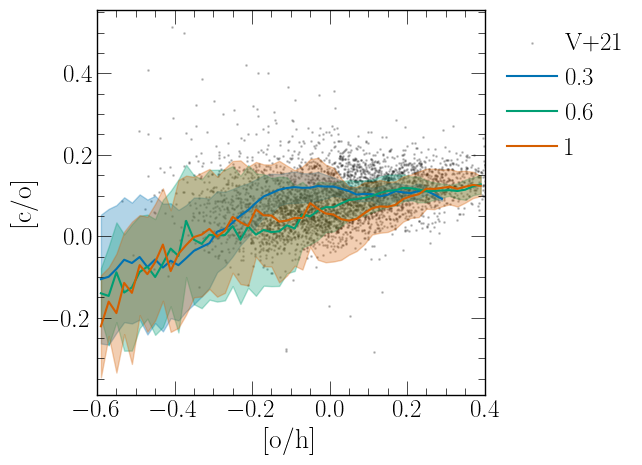

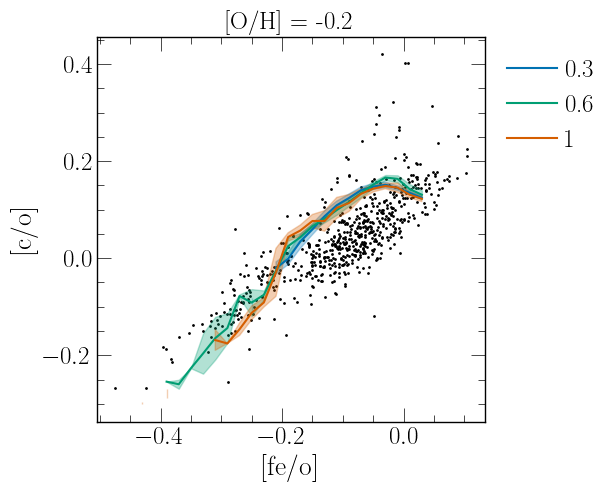

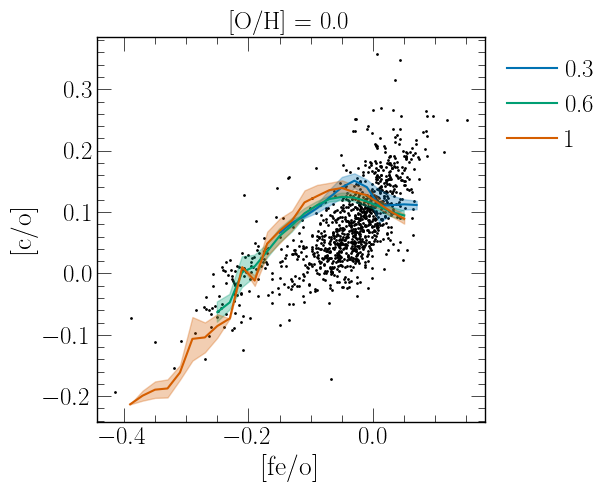

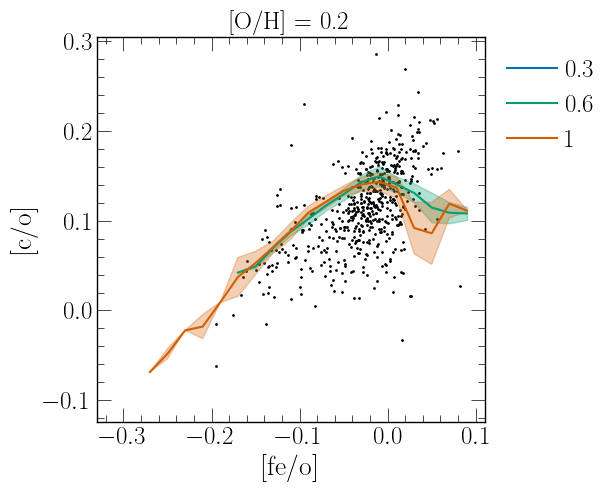

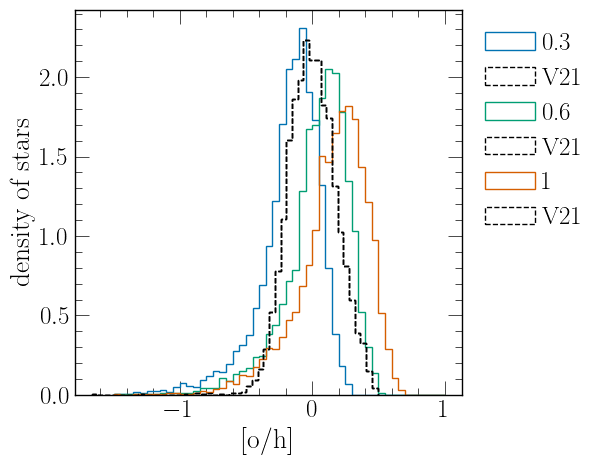

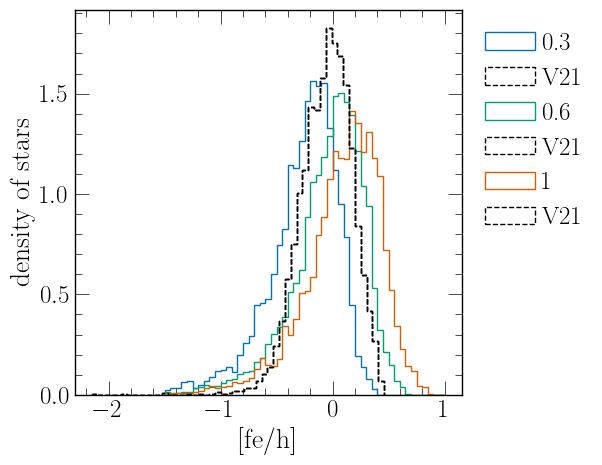

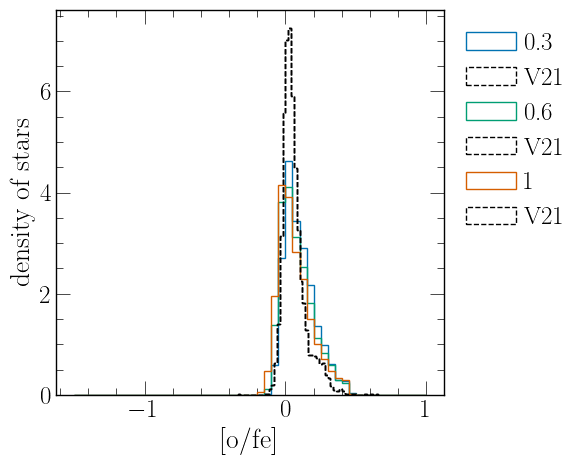

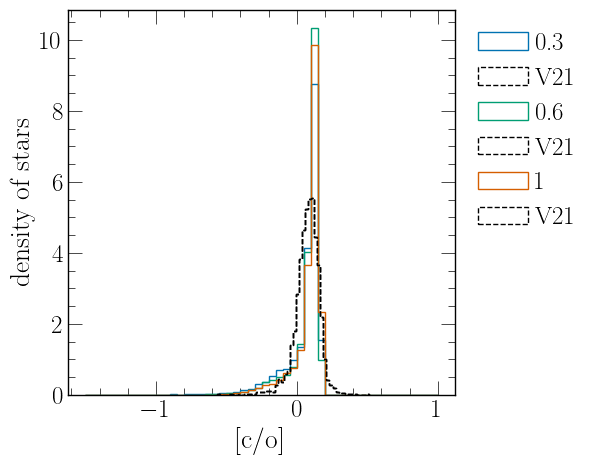

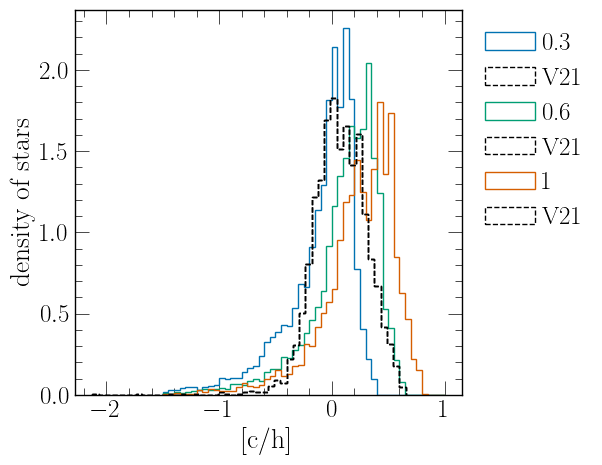

In [12]:
names = []
for eta in ["0.3", "0.6", "1"]:
    agb = "cristallo11"
    beta = "0.3"
    f = "0.4"
    names.append(model_id(agb=agb, beta=beta, eta=eta, f_agb=f))
    
compare(names, ["0.3", "0.6", "1"], mdf=True)

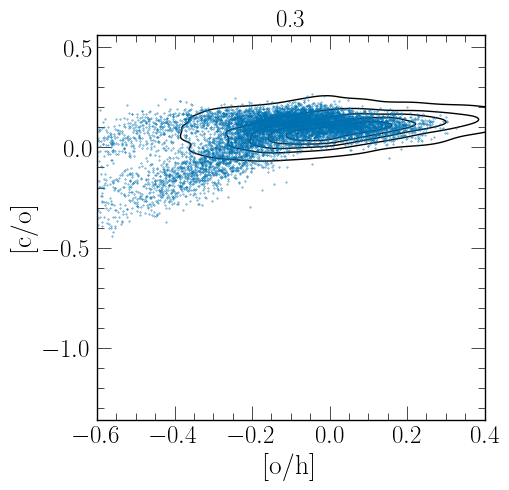

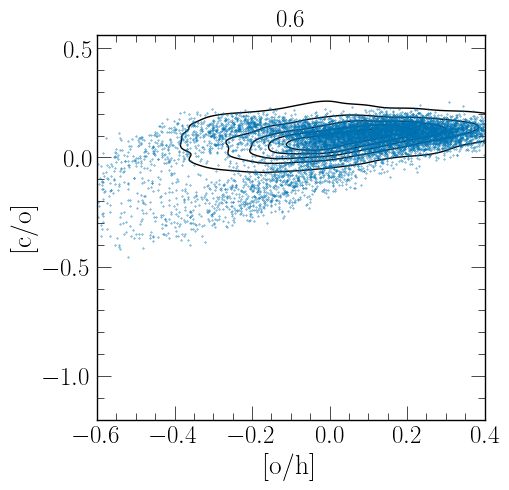

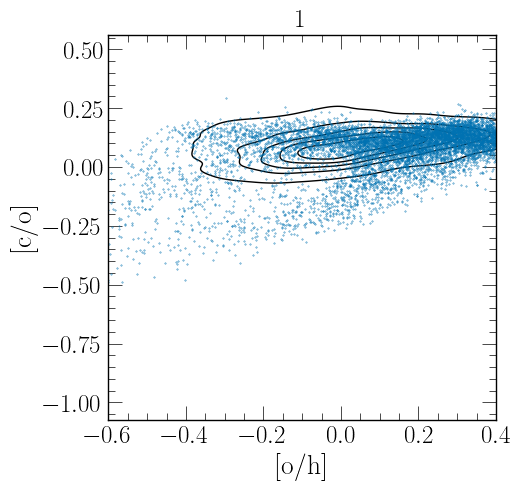

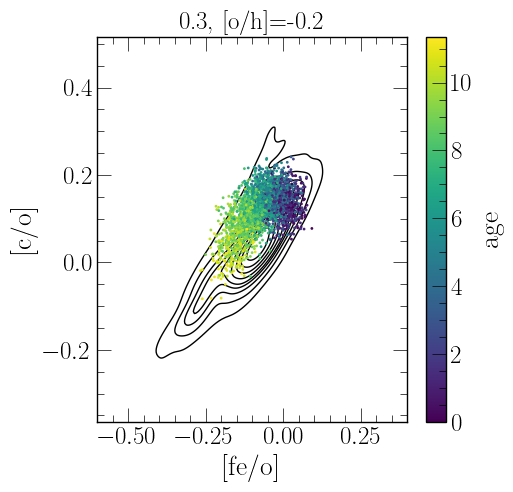

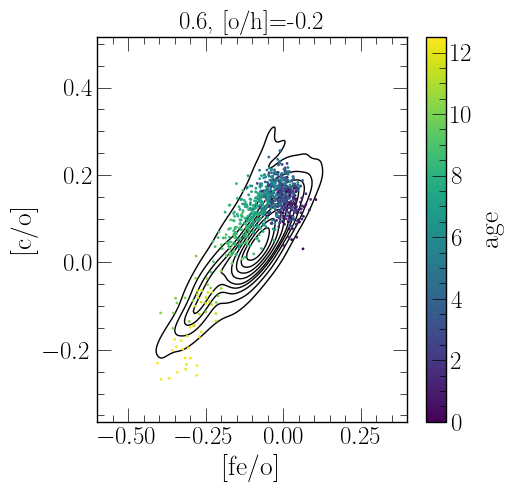

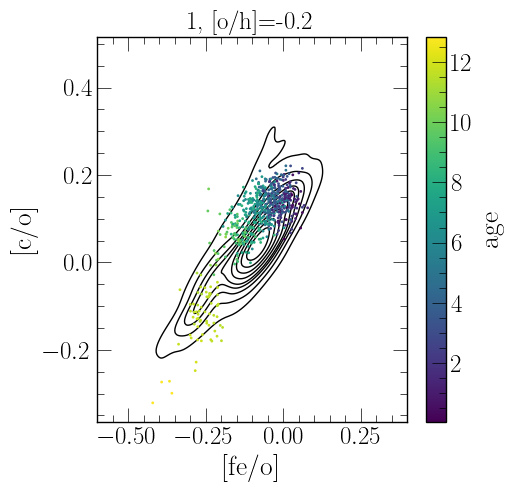

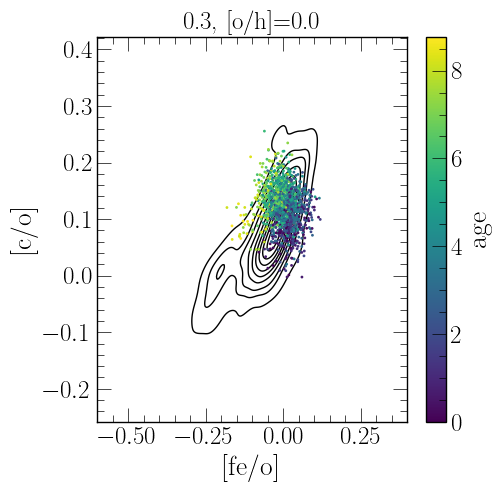

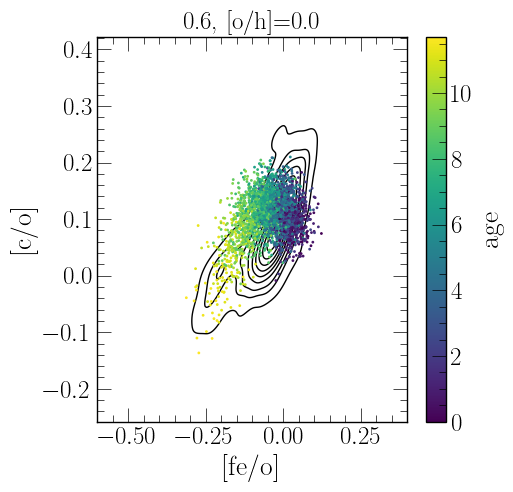

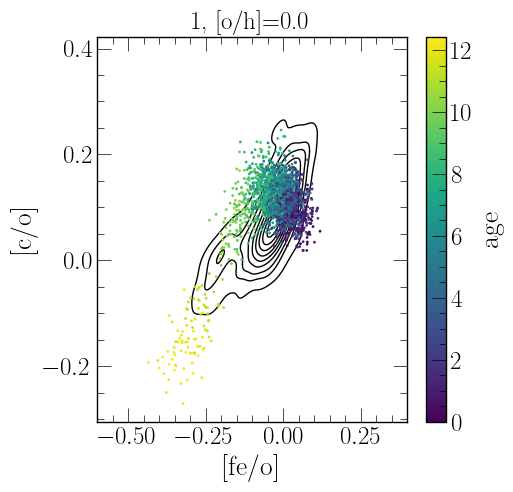

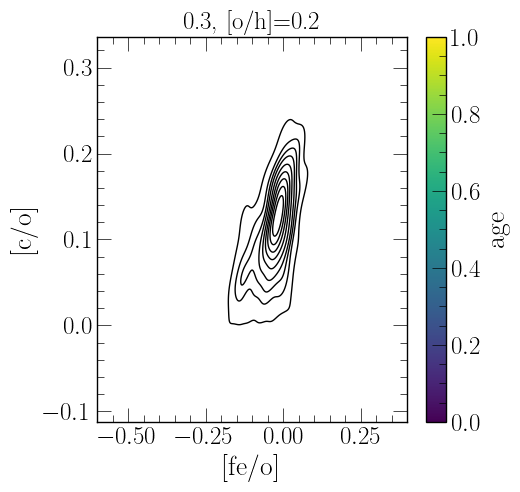

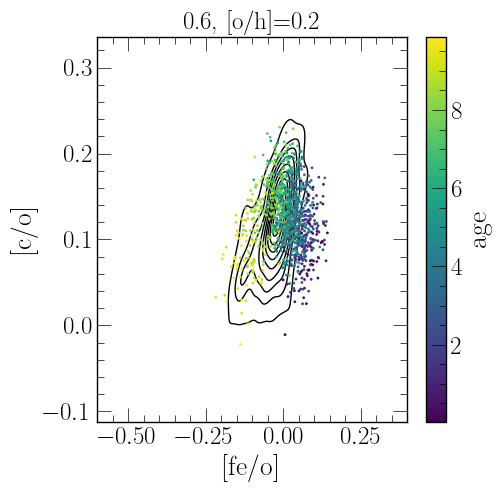

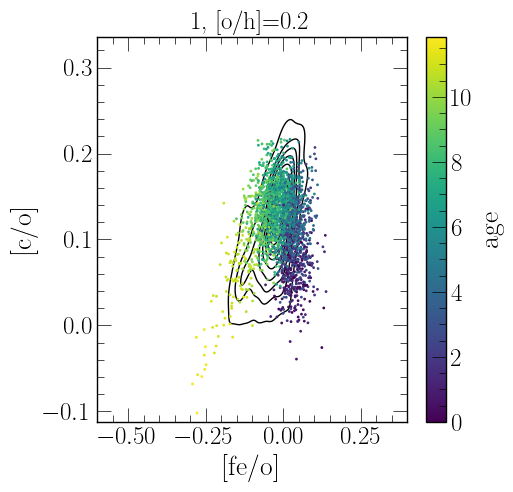

In [14]:
compare_stars(names, ["0.3", "0.6", "1"])